##### Iмпорую бiблiотеки для роботи

In [50]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from sklearn import datasets

In [51]:
sns.set(style="darkgrid")

%matplotlib inline

##### Завантажую данi

In [52]:
data = pd.read_csv('spambase.data')
data_array = np.array(data)

In [53]:
names = []
f = open('names.txt')
text = f.readlines()
for line in text:
    names.append(line.replace('\n',''))
f.close()

In [54]:
X, y = pd.DataFrame(data_array, columns=names), names
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0,1.0


##### Cтатистика по даним

In [55]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


##### Сортую данi на спам / не спам

In [56]:
word_freq_make_for_notspam = [x[0] for x in data_array if x[-1]==0] 
word_freq_make_for_spam = [x[0] for x in data_array if x[-1]==1] 

plt.figure();

x_list_notspam = [i for i in range(1, len(word_freq_make_for_notspam)+1)]
x_list_spam = [i for i in range(len(word_freq_make_for_notspam)+1, len(word_freq_make_for_notspam)+1+len(word_freq_make_for_spam))]

<Figure size 432x288 with 0 Axes>

##### Функцiя для порiвняння параметрiв повiдомлень зi спамом та без

In [57]:
def show_graph_for_parameter(data_array = [], parameter_column = 0, name = "", ax = None):
    y_for_notspam = sorted([line[parameter_column] for line in data_array if line[-1]==0])
    x_for_notspam = range(1, len(y_for_notspam)+1)
    
    y_for_spam = sorted([line[parameter_column] for line in data_array if line[-1]==1])
    x_for_spam = range(len(y_for_notspam)+1, len(y_for_spam)+len(y_for_notspam)+1)
    
    ax.scatter(x_for_notspam, y_for_notspam)
    ax.scatter(x_for_spam, y_for_spam)
    ax.set_title(name)
    ax.set_xlabel('not spam / spam')

##### Для кожного параметра окрiм останнього, який вiдповiдає за спам(1) / не спам(0), будую порiвняльний графiк 
##### (синiй - не спам, червоний - спам)

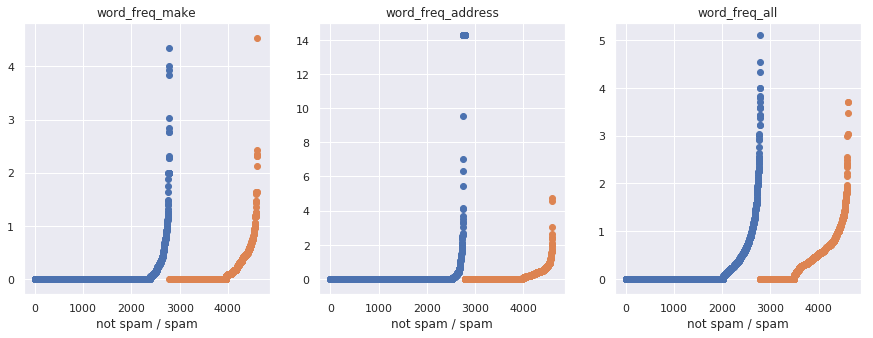

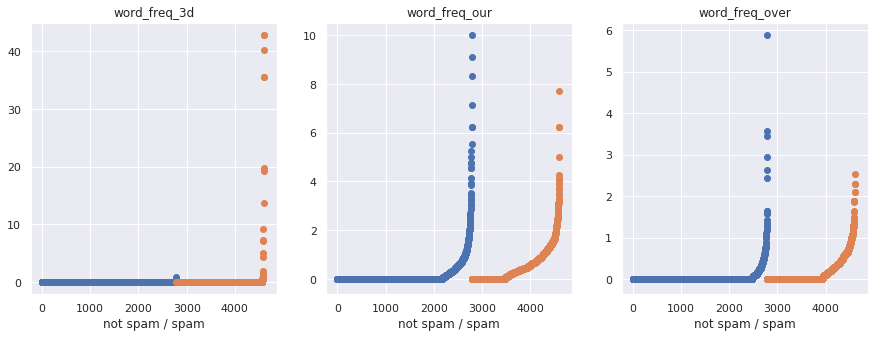

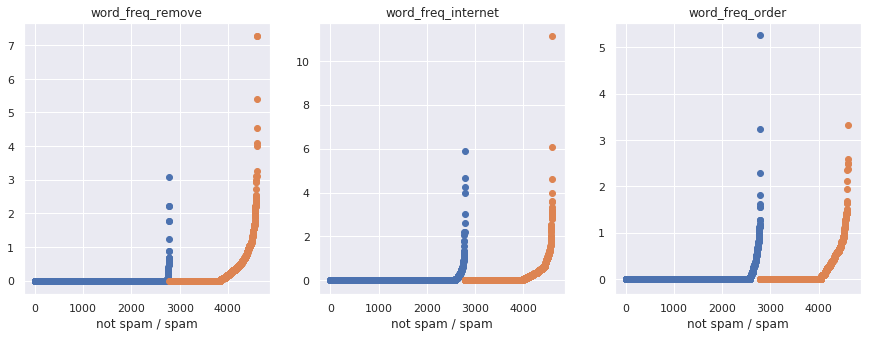

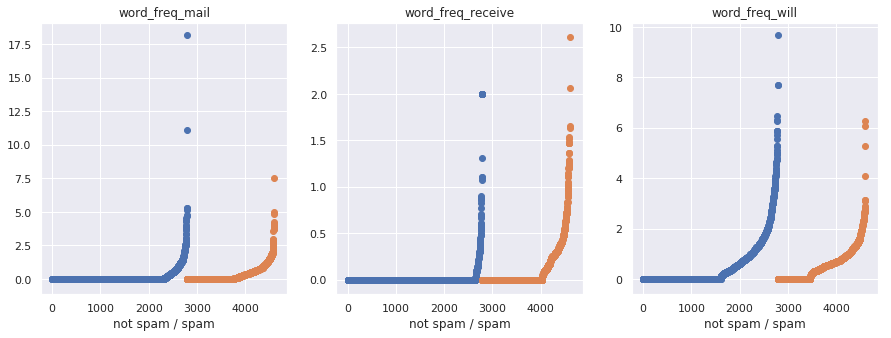

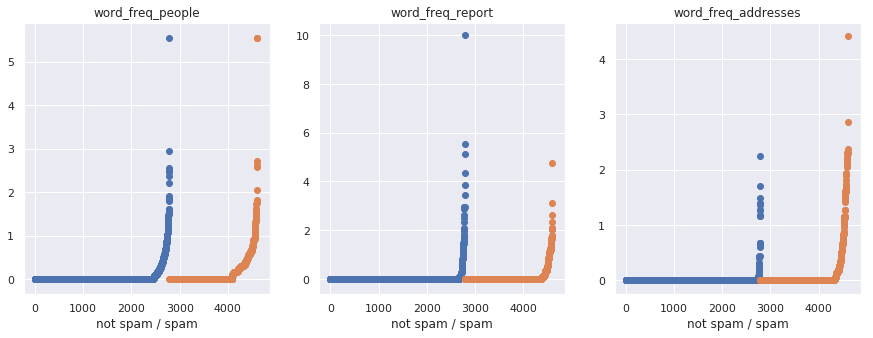

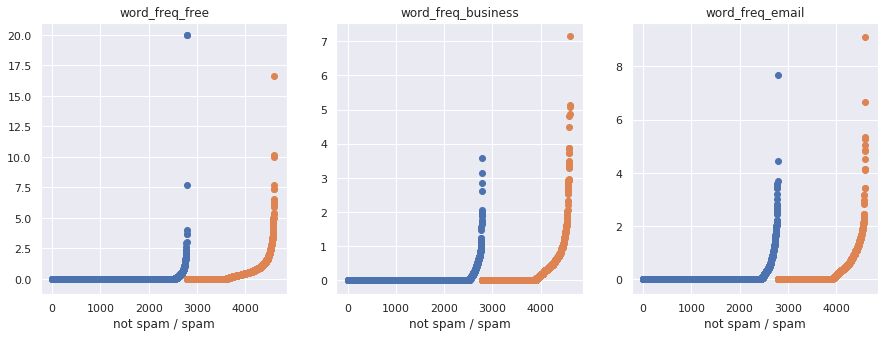

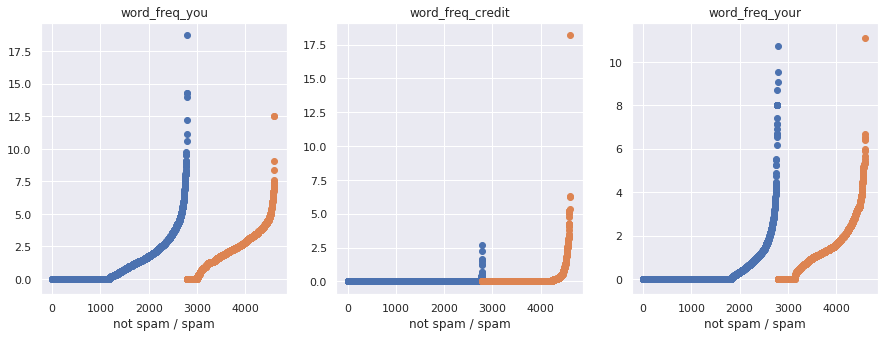

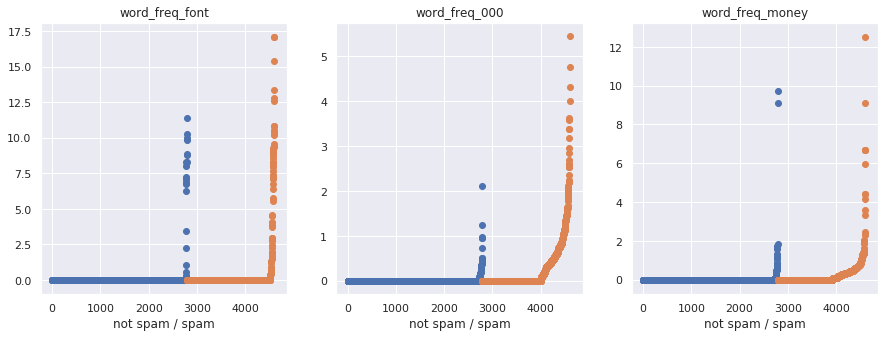

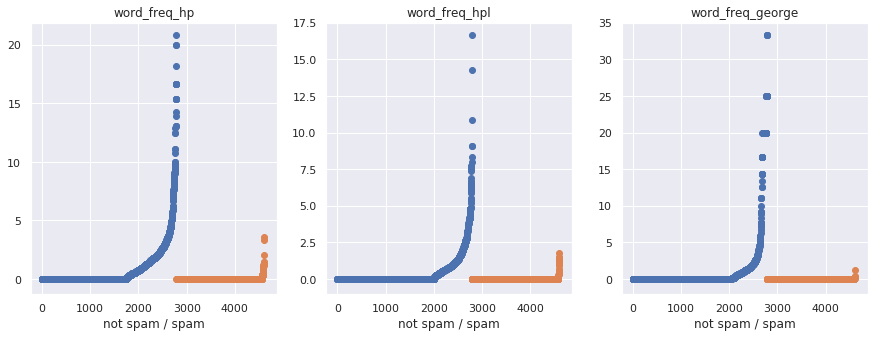

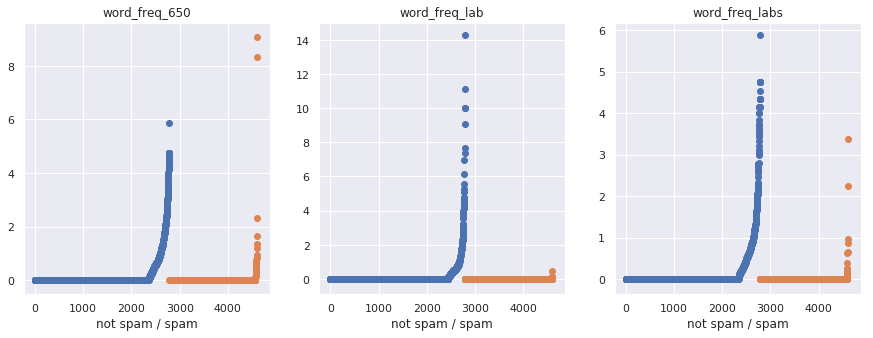

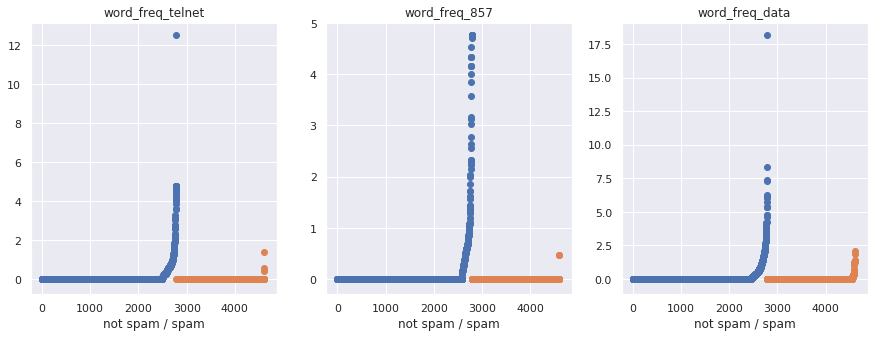

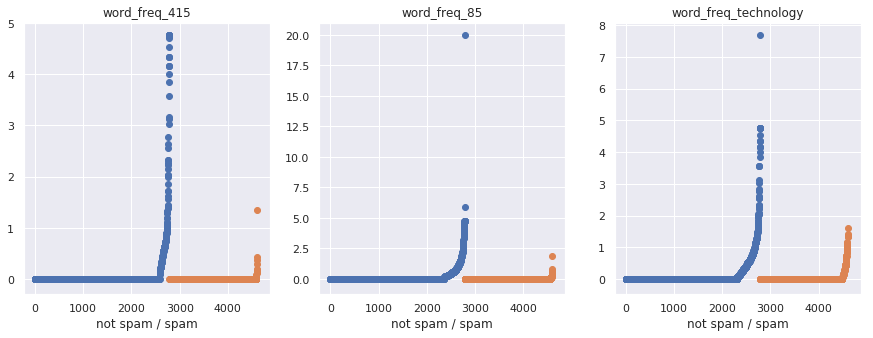

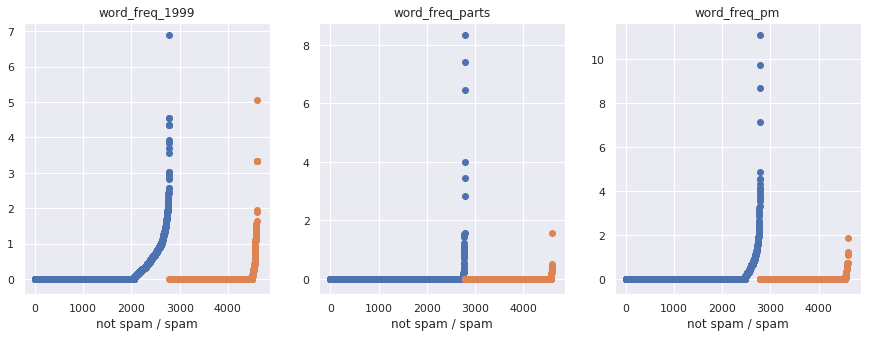

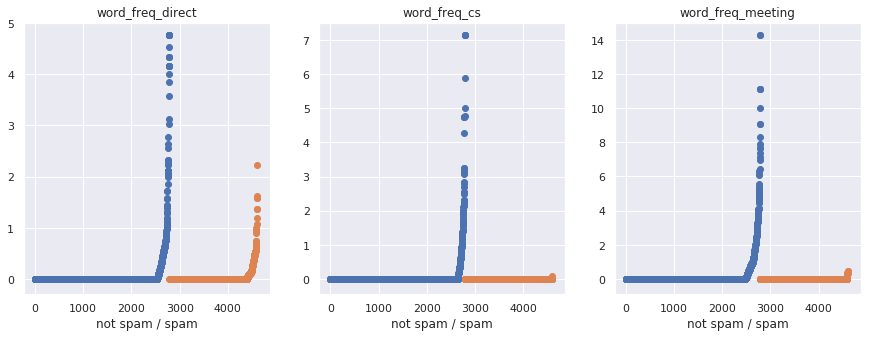

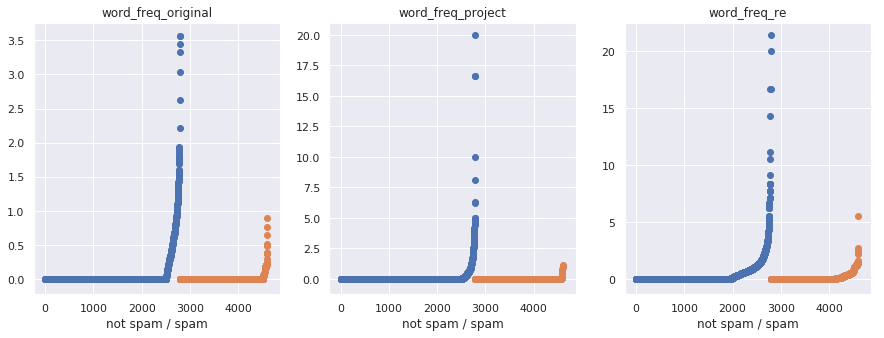

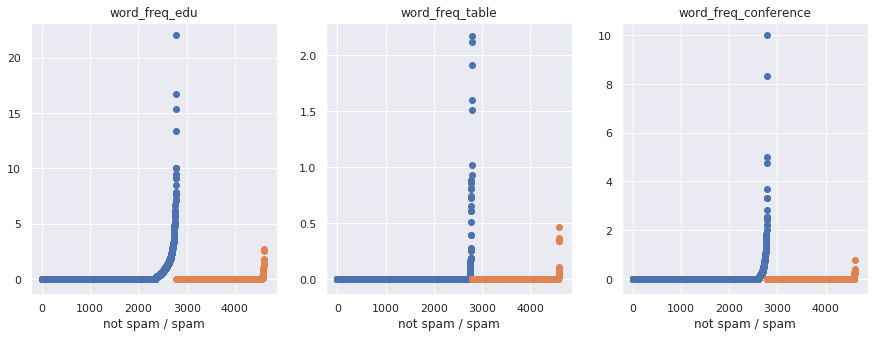

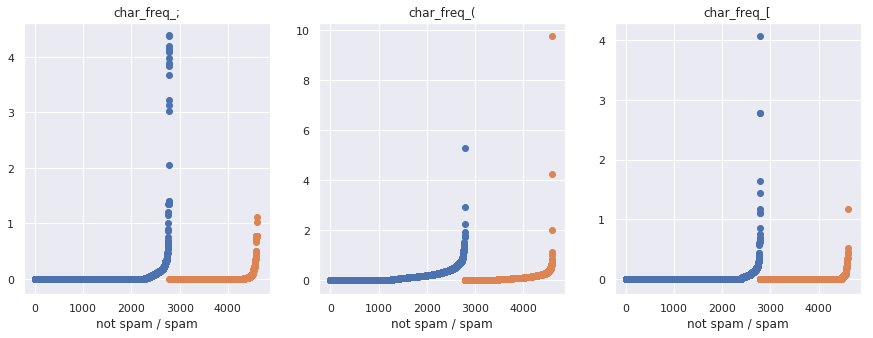

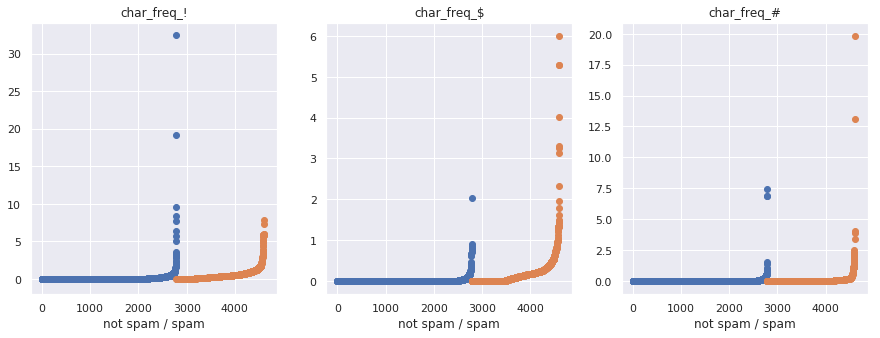

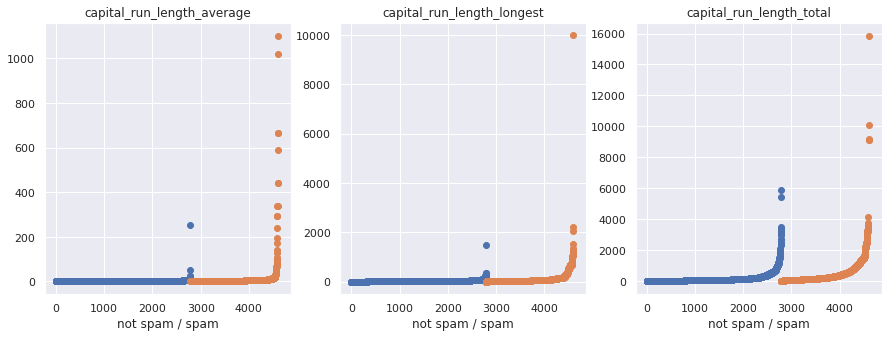

In [58]:
counter = 0
for name in names[:-1]:
    if counter==0:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
        counter = (counter+1)%3
        show_graph_for_parameter(data_array = data_array, parameter_column = names.index(name), name = name, ax = ax1)
    elif counter==1:
        counter = (counter+1)%3
        show_graph_for_parameter(data_array = data_array, parameter_column = names.index(name), name = name, ax = ax2)
    else:
        counter = (counter+1)%3
        show_graph_for_parameter(data_array = data_array, parameter_column = names.index(name), name = name, ax = ax3)
        plt.show()
plt.show()

###### У деяких графiках спостерiгається незначна залежнiсть мiж max значенням параметра i типом повiдомлень, в якому вiн цього значення набуває.

##### Для кожного параметра будую гiстаграму кiлькостi.

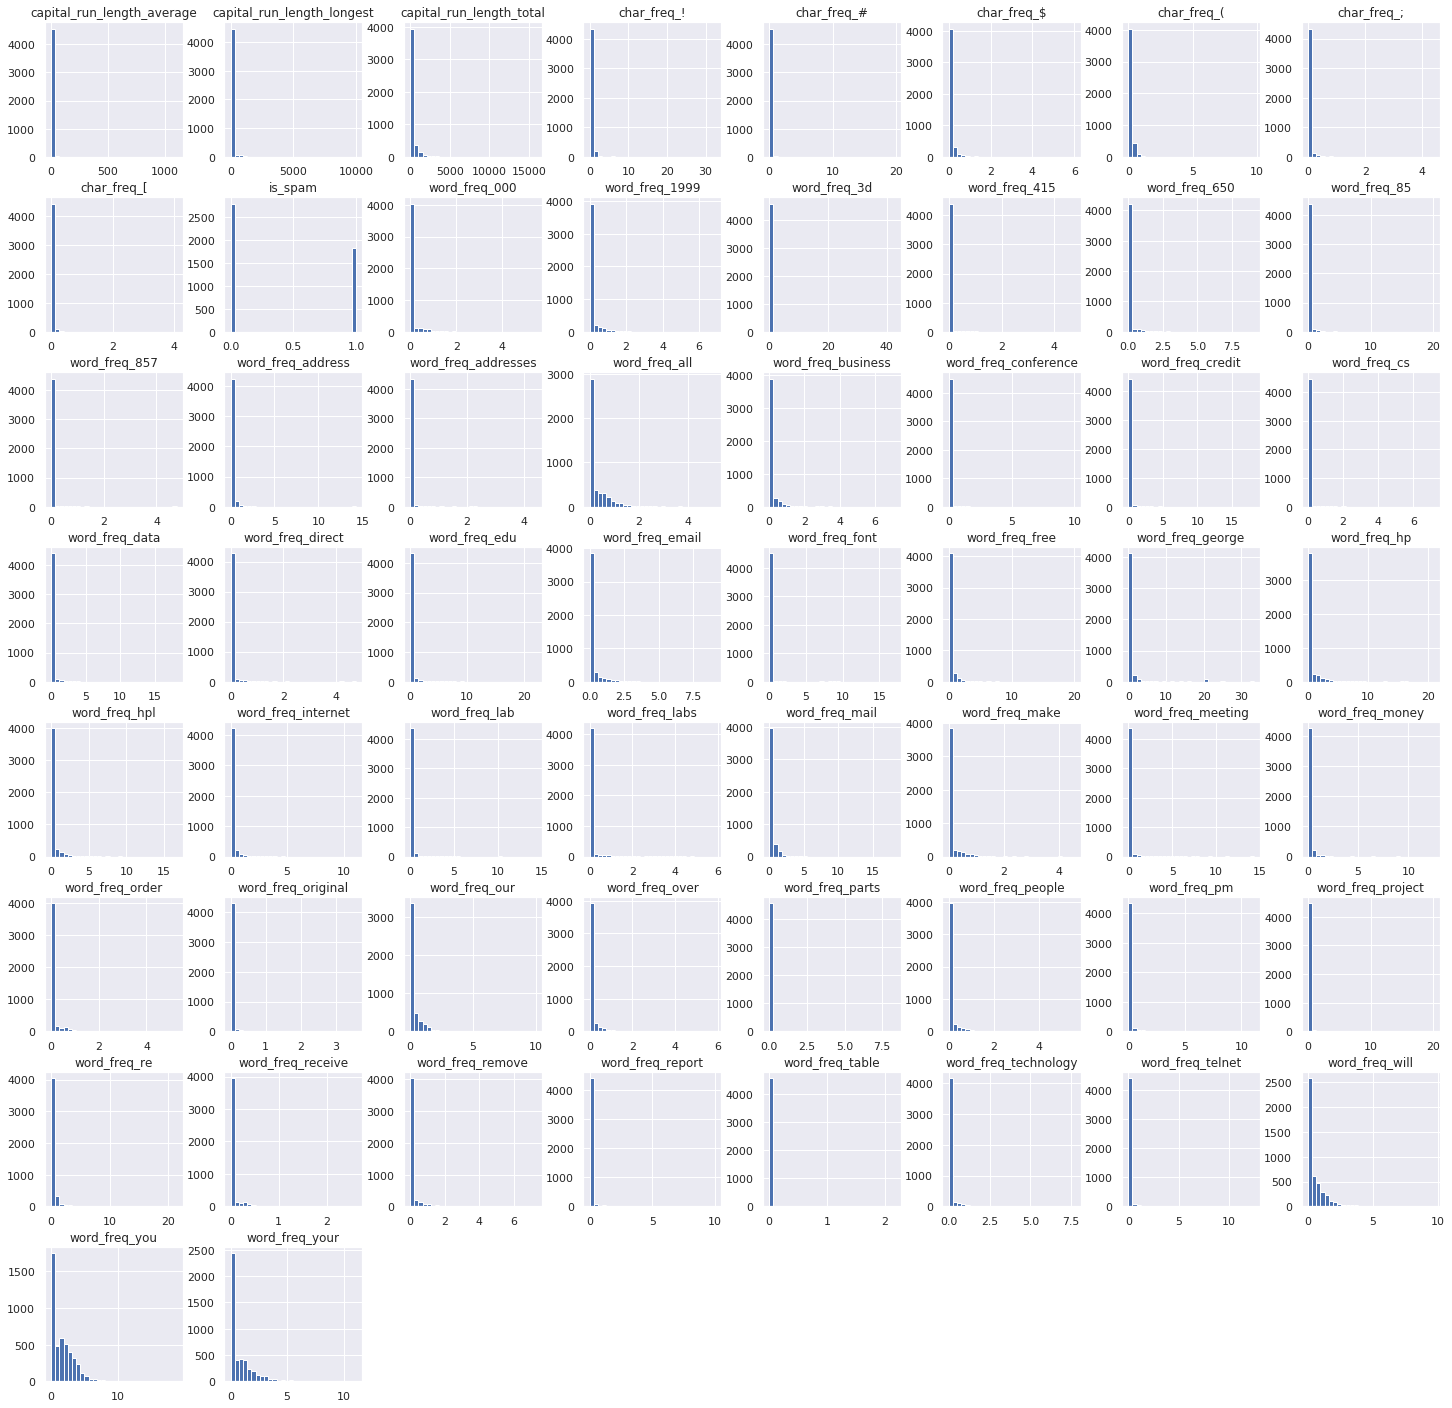

In [59]:
X.hist(bins=30,figsize=(25,25));

In [60]:
data.columns = names

##### Теплова карта показує прямокутник залежностi парамерiв в центрi, з коефiцiєнтом кореляцiї k > 0.375

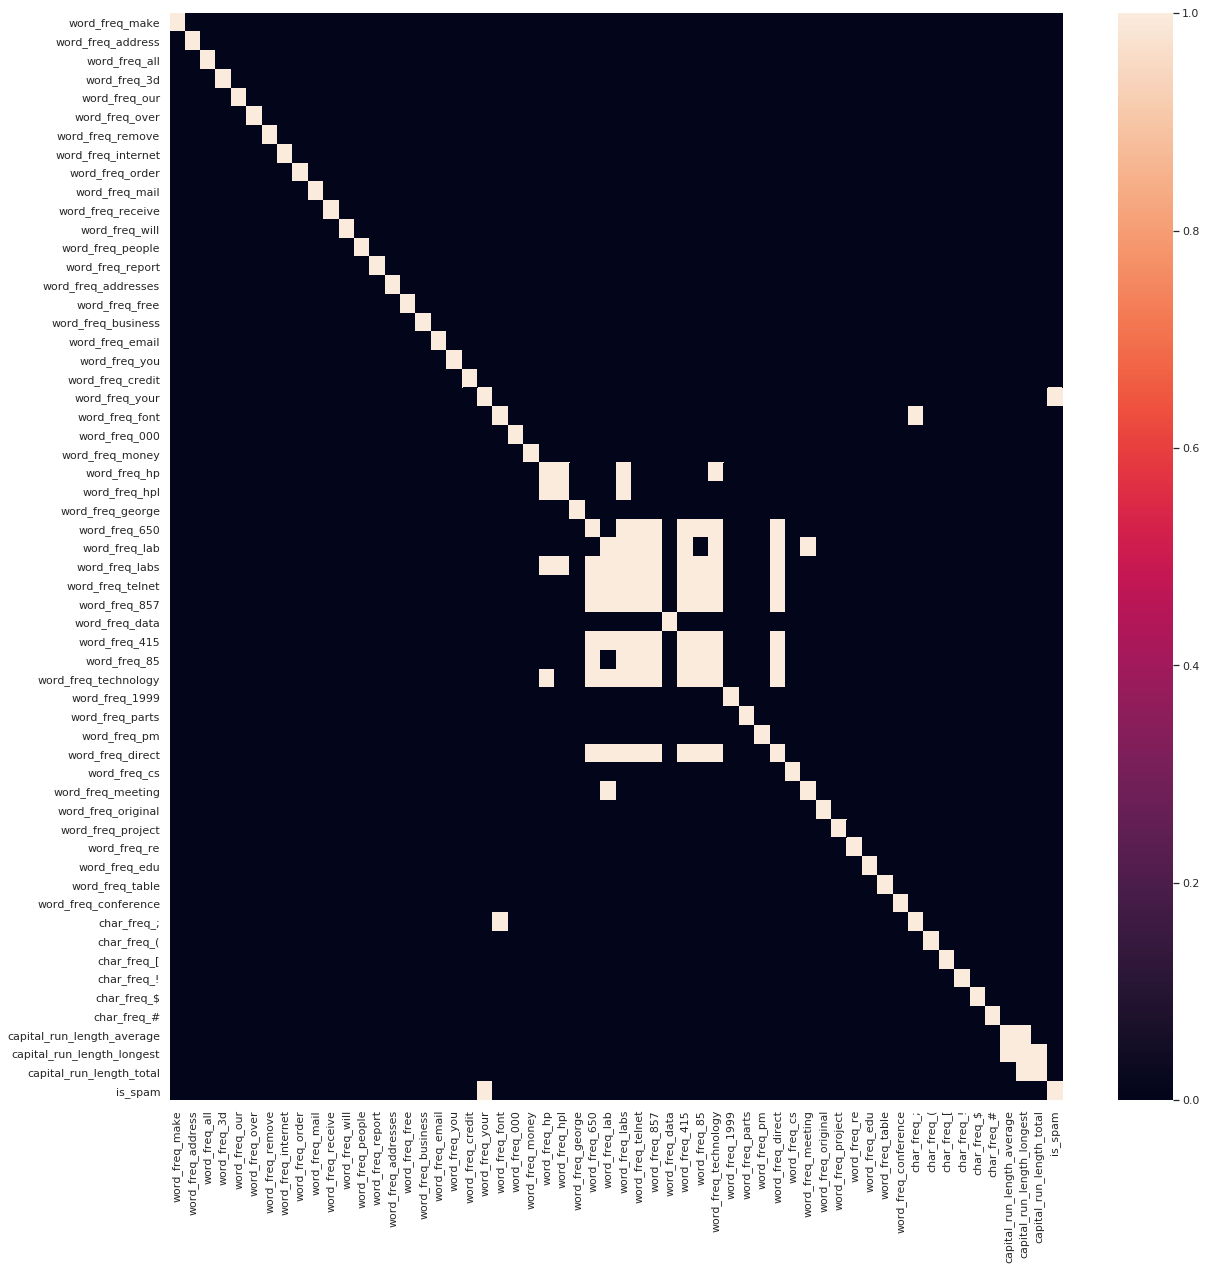

In [61]:
plt.figure(figsize = (20, 20));
sns.heatmap(data.corr()>0.375);

### Класифiкатор, який використовує алгоритм логiстичної регресiї.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, log_loss, accuracy_score

train_x, test_x, train_y, test_y = train_test_split([line[:-1] for line in data_array], [line[-1] for line in data_array], test_size=0.3, random_state=42)

##### На основi даних про кореляцiї з heatmap, вiдбираю лише параметри з високою кореляцiєю (вони описують квадрат в центрi).

In [63]:
pos1 = names.index('word_freq_your')
pos2 = names.index('word_freq_meeting')

train_x = [line[pos1:pos2] for line in train_x]
test_x = [line[pos1:pos2] for line in test_x]

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
LRclassifier = LogisticRegression()
LRclassifier.fit(train_x, train_y);

In [84]:
print("Logistic loss during training: ", log_loss(LRclassifier.predict(train_x), train_y));

Logistic loss during training:  5.041451422487209


In [85]:
print("Accuracy testing: ", accuracy_score(LRclassifier.predict(test_x), test_y))

Accuracy testing:  0.836231884057971


##### Визначаю значення вагiв пiсля регресiї та вiдображаю їх графiчно

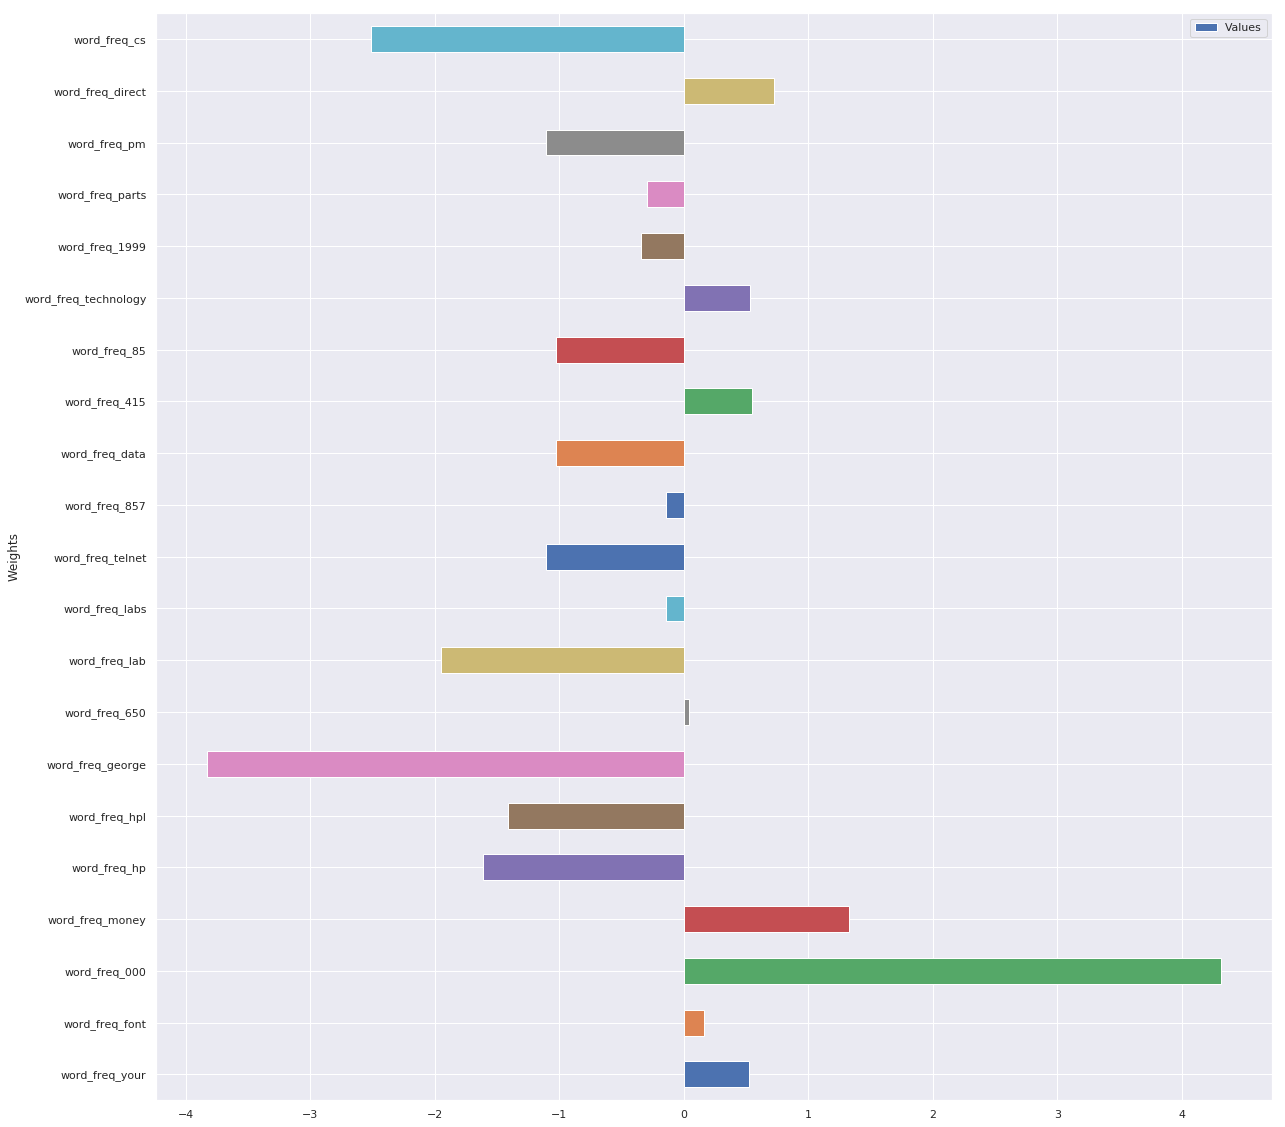

In [86]:
coeffs = LRclassifier.coef_
count_names = pos2-pos1
d = count_names//2

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
df1 = pd.DataFrame({'Weights': names[pos1:pos2], 'Values': coeffs[0]})
df1.plot("Weights", "Values", kind="barh", ax = ax1);

### Класифiкатор, який використовує SVC.

In [87]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

svc = SVC(kernel="linear", C=0.5) 

In [88]:
svc.fit(train_x, train_y)
print("Accuracy training svc: {}".format(roc_auc_score(train_y, svc.predict(train_x))))

Accuracy training svc: 0.8110963807503645


In [89]:
print("Accuracy of data testing: {}".format(roc_auc_score(test_y, svc.predict(test_x))))

Accuracy of data testing: 0.7904662109809185


### Класифiкатори RandomForest, DecisionTree

##### Створюю i треную класифiкатор DecisionTree.

In [90]:
from sklearn import tree

In [91]:
DTC = tree.DecisionTreeClassifier(max_depth=10)
DTC.fit(train_x, train_y);

In [92]:
print("Accurate to training data: ", accuracy_score(train_y, DTC.predict(train_x)))
print("Accurate to test data: ", accuracy_score(test_y, DTC.predict(test_x)))

Accurate to training data:  0.886335403726708
Accurate to test data:  0.8398550724637681


##### Створюю i навчаю класифiкатор RandomForest.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
RFC = RandomForestClassifier(n_estimators=10)
RFC.fit(train_x, train_y);

In [95]:
print("Accurate to training data: ", accuracy_score(train_y, RFC.predict(train_x)))
print("Accurate to test data: ", accuracy_score(test_y, RFC.predict(test_x)))

Accurate to training data:  0.9288819875776397
Accurate to test data:  0.8405797101449275


##### Порiвняння ефективностей: DecisionTreeClassifier vs RandomForestClassifier.

In [96]:
depths_acc = []
trees_acc = []

for n in range(1, 101):
    DTC = tree.DecisionTreeClassifier(max_depth=n)
    DTC.fit(train_x, train_y);
    depths_acc.append(accuracy_score(test_y, DTC.predict(test_x)))
                       
    RFC = RandomForestClassifier(n_estimators=n)
    RFC.fit(train_x, train_y);
    trees_acc.append(accuracy_score(test_y, RFC.predict(test_x)))
    
listX = range(1, 101)

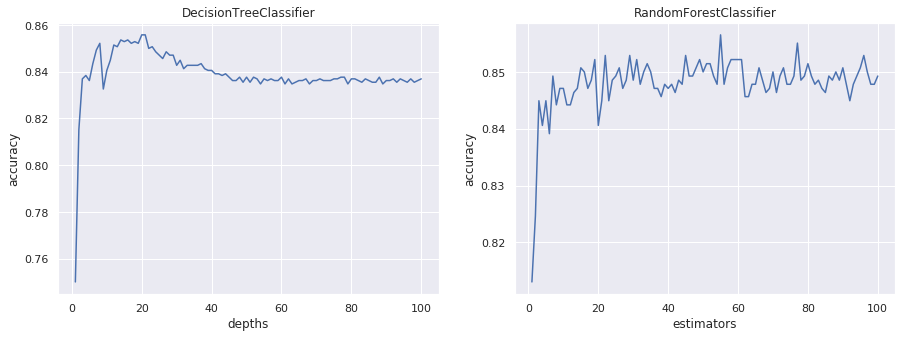

In [97]:
fig, (dtc_graph, rfc_graph) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
listX = range(1, 101)
dtc_graph.plot(listX, depths_acc);
dtc_graph.set_title('DecisionTreeClassifier');
dtc_graph.set_xlabel('depths');
dtc_graph.set_ylabel('accuracy');
rfc_graph.plot(listX, trees_acc);
rfc_graph.set_title('RandomForestClassifier');
rfc_graph.set_xlabel('estimators');
rfc_graph.set_ylabel('accuracy');